In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
rows,columns = df.shape
number_features =len(df.columns)
print (f"\nNumber of rows and columns: {rows,columns}")
print(f"\nTotal number of features :{number_features}")


Number of rows and columns: (2111, 17)

Total number of features :17


In [2]:


import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from time import time


# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
# Display the top 5 rows of the dataset
from IPython.display import display
# Display the top 5 rows of the dataset
display(df.head())


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 1. Data Preprocessing: 

Include only steps in Assignment 1 which are sensible for your dataset. 

In [3]:
# Identify missing values and describe the data quality of the dataset(The dataset by default has no missing values)
missing_values = df.isnull().sum()
print("Missing Values and the :\n", missing_values)


# Identify duplicate entries from the dataset and describe the data quality of the dataset
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Number of duplicate rows: {duplicates}")


Missing Values and the :
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Number of duplicate rows: 24


In [4]:
# Initialize  MinMaxScaler
# This particular normalization method scales the data to a fixed range [0,1]
scaler = MinMaxScaler()

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


print(df.head())

   Gender       Age    Height    Weight family_history_with_overweight FAVC  \
0  Female  0.148936  0.320755  0.186567                            yes   no   
1  Female  0.148936  0.132075  0.126866                            yes   no   
2    Male  0.191489  0.660377  0.283582                            yes   no   
3    Male  0.276596  0.660377  0.358209                             no   no   
4    Male  0.170213  0.622642  0.379104                             no   no   

   FCVC       NCP       CAEC SMOKE  CH2O  SCC       FAF  TUE        CALC  \
0   0.5  0.666667  Sometimes    no   0.5   no  0.000000  0.5          no   
1   1.0  0.666667  Sometimes   yes   1.0  yes  1.000000  0.0   Sometimes   
2   0.5  0.666667  Sometimes    no   0.5   no  0.666667  0.5  Frequently   
3   1.0  0.666667  Sometimes    no   0.5   no  0.666667  0.0  Frequently   
4   0.5  0.000000  Sometimes    no   0.5   no  0.000000  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transporta

In [5]:
# Identify columns that are categorical
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [6]:
label_encoder = LabelEncoder()
columns_to_encode = [
    'NObeyesdad', 'MTRANS', 'CALC', 'SCC',
    'SMOKE', 'CAEC', 'FAVC', 'family_history_with_overweight', 'Gender'
]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df.to_csv('cleanup_data.csv', index=False)
print(df.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.148936  0.320755  0.186567                               1     0   
1       0  0.148936  0.132075  0.126866                               1     0   
2       1  0.191489  0.660377  0.283582                               1     0   
3       1  0.276596  0.660377  0.358209                               0     0   
4       1  0.170213  0.622642  0.379104                               0     0   

   FCVC       NCP  CAEC  SMOKE  CH2O  SCC       FAF  TUE  CALC  MTRANS  \
0   0.5  0.666667     2      0   0.5    0  0.000000  0.5     3       3   
1   1.0  0.666667     2      1   1.0    1  1.000000  0.0     2       3   
2   0.5  0.666667     2      0   0.5    0  0.666667  0.5     1       3   
3   1.0  0.666667     2      0   0.5    0  0.666667  0.0     1       4   
4   0.5  0.000000     2      0   0.5    0  0.000000  0.0     2       3   

   NObeyesdad  
0           1  
1           1  
2           1  
3   

## 2. Feature Selection: 
Apply at least two different feature selection techniques (one from filter and wrapper each)to select relevant features from the dataset. Compare the selected feature sets and justify their relevance to the target variable. 

In [7]:
# Filter Method: Mutual Information

# Separate features (X) and target variable (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Calculate mutual information scores for each feature with respect to the target variable
mutual_info = mutual_info_classif(X, y, random_state=42)

# Store the mutual information scores along with their corresponding feature names
mutual_info_scores = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Info': mutual_info
}).sort_values(by='Mutual_Info', ascending=False)

# Print the mutual information scores sorted in descending order
print("Mutual Information Scores (Filter Method):")
print(mutual_info_scores)


Mutual Information Scores (Filter Method):
                           Feature  Mutual_Info
3                           Weight     1.252783
1                              Age     0.598882
2                           Height     0.416157
6                             FCVC     0.392155
12                             FAF     0.306089
10                            CH2O     0.292139
13                             TUE     0.281952
7                              NCP     0.265705
0                           Gender     0.204387
4   family_history_with_overweight     0.166680
8                             CAEC     0.137055
14                            CALC     0.082861
5                             FAVC     0.067466
15                          MTRANS     0.066998
11                             SCC     0.017684
9                            SMOKE     0.006636


In [8]:
# Wrapper Method: Recursive Feature Elimination (RFE)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=10000)

# Create the RFE object, setting the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Transform the training and testing datasets to the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the logistic regression model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Selected features: {rfe.support_}")
print(f"Feature ranking: {rfe.ranking_}")
print(f"Model accuracy after RFE: {accuracy:.4f}")

# Transform the dataset to include only the selected features
X_train_rfe = rfe.transform(X)
print(X_train_rfe)






Selected features: [ True  True  True  True False False  True False False False False False
 False False False False]
Feature ranking: [ 1  1  1  1  2  4  1  3  8 10  6  7  5 11  9 12]
Model accuracy after RFE: 0.6938
[[0.         0.14893617 0.32075472 0.18656716 0.5       ]
 [0.         0.14893617 0.13207547 0.12686567 1.        ]
 [1.         0.19148936 0.66037736 0.28358209 0.5       ]
 ...
 [0.         0.18136247 0.5702     0.70663696 1.        ]
 [0.         0.22046672 0.54613208 0.70407941 1.        ]
 [0.         0.20563211 0.54497358 0.70501971 1.        ]]


In [9]:
rfe_selected_features = pd.DataFrame({
    'Feature': X.columns,
    'RFE_Ranking': rfe.ranking_
})

# Compare the results
print("\nComparison of Feature Sets:")
mutual_info_top = mutual_info_scores.head(5)
rfe_top = rfe_selected_features[rfe_selected_features['RFE_Ranking'] == 1]

print(f"Top 5 Features by Mutual Information: {mutual_info_top['Feature'].values}")
print(f"Top Features by RFE: {rfe_top['Feature'].values}")


Comparison of Feature Sets:
Top 5 Features by Mutual Information: ['Weight' 'Age' 'Height' 'FCVC' 'FAF']
Top Features by RFE: ['Gender' 'Age' 'Height' 'Weight' 'FCVC']


#### Using the  mutual information method  top features   are Weight , Age and Height,FAF and FVC which are the top 5 features contributes obesity which have highest the number of mutual scores making it relevant to the target variable

#### Using RFE we can see that it chooses the top five feature are Gender ,Age ,Height ,Weight, FCVC choosing less feature will give bad model accuracy and performance 


## 3. Feature Reduction:
 
Implement two different feature reduction techniques to reduce the dimensionality of the dataset. Visualize the reduced data and discuss the effect of the reduction on data. 

####  The cluster after using PCA are not clear they  is no clear boundary for the data points after using it. 
#### PCA will reduce the dimesion and give maximum  variance

Text(0.5, 1.0, 'PCA Reduced Data')

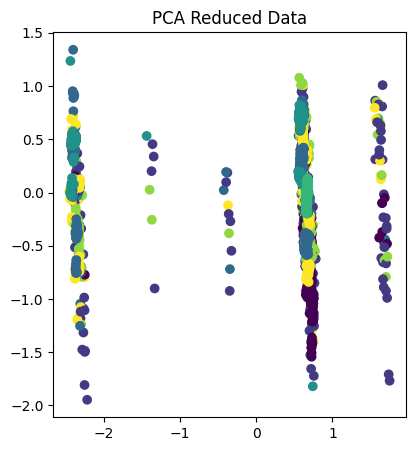

In [10]:
# PCA for Feature Reduction (reducing to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizing PCA Reduced Data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Reduced Data')



#### On the other hand why LDA is better than PCA take the direction where the variance of the projected points is the lowest the distance mean of projected point of individual categories should be able as high as possible . Therefore clustering becomes easier and becomes clearly as shown in the plots

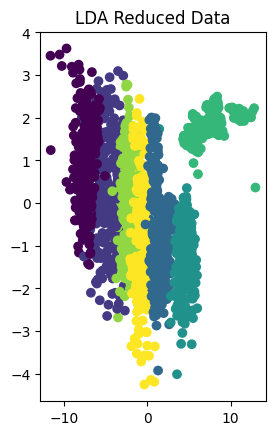

In [11]:
# LDA for Feature Reduction (reducing to 2 components for visualization)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Visualizing LDA Reduced Data
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA Reduced Data')
plt.show()

## 4 Classification: 
Experiment with five stand-alone classifiers (e.g., Logistic Regression, Decision Tree, Random Forest, SVM, K-Nearest Neighbors) using: 

(a) the original dataset, 

(b) the feature-selected dataset, 

(c) the feature-reduced dataset. Compare the classification accuracy and other relevant metrics (e.g., precision, recall, F1-score) for each dataset. 

In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.3, random_state=42)
X_lda_train, X_lda_test = train_test_split(X_lda, test_size=0.3, random_state=42)
X_train_rfe, X_rfe_test, y_rfe, y_test = train_test_split(X_train_rfe, y, test_size=0.3, random_state=42)

# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Function to evaluate classifiers
def evaluate_classifier(X_train, X_test, y_train, y_test, classifier):
    start_time = time()
    clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    end_time = time()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    computation_time = end_time - start_time
    return accuracy, precision, recall, f1, computation_time

# Evaluate on original, PCA, LDA, and RFE datasets
results = {}

for name, clf in classifiers.items():
    print(f"Classifier: {name}")
    
    # Original Dataset
    acc_orig, prec_orig, rec_orig, f1_orig, time_orig = evaluate_classifier(X_train, X_test, y_train, y_test, clf)
    
    # PCA Reduced Dataset
    acc_pca, prec_pca, rec_pca, f1_pca, time_pca = evaluate_classifier(X_pca_train, X_pca_test, y_train, y_test, clf)
    
    # LDA Reduced Dataset
    acc_lda, prec_lda, rec_lda, f1_lda, time_lda = evaluate_classifier(X_lda_train, X_lda_test, y_train, y_test, clf)

    # RFE Selected Dataset
    acc_rfe, prec_rfe, rec_rfe, f1_rfe, time_rfe = evaluate_classifier(X_train_rfe, X_rfe_test, y_rfe, y_test, clf)
    
    # Store results for comparison
    results[name] = {
        "Original": [acc_orig, prec_orig, rec_orig, f1_orig, time_orig],
        "PCA": [acc_pca, prec_pca, rec_pca, f1_pca, time_pca],
        "LDA": [acc_lda, prec_lda, rec_lda, f1_lda, time_lda],
        "RFE": [acc_rfe, prec_rfe, rec_rfe, f1_rfe, time_rfe]
    }

# Display results
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Original: Accuracy = {metrics['Original'][0]:.2f}, Precision = {metrics['Original'][1]:.2f}, Recall = {metrics['Original'][2]:.2f}, F1-Score = {metrics['Original'][3]:.2f}, Time = {metrics['Original'][4]:.4f}s")
    print(f"PCA Reduced: Accuracy = {metrics['PCA'][0]:.2f}, Precision = {metrics['PCA'][1]:.2f}, Recall = {metrics['PCA'][2]:.2f}, F1-Score = {metrics['PCA'][3]:.2f}, Time = {metrics['PCA'][4]:.4f}s")
    print(f"LDA Reduced: Accuracy = {metrics['LDA'][0]:.2f}, Precision = {metrics['LDA'][1]:.2f}, Recall = {metrics['LDA'][2]:.2f}, F1-Score = {metrics['LDA'][3]:.2f}, Time = {metrics['LDA'][4]:.4f}s")
    print(f"RFE: Accuracy = {metrics['RFE'][0]:.2f}, Precision = {metrics['RFE'][1]:.2f}, Recall = {metrics['RFE'][2]:.2f}, F1-Score = {metrics['RFE'][3]:.2f}, Time = {metrics['RFE'][4]:.4f}s")

Classifier: Logistic Regression
Classifier: Decision Tree


c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classifier: Random Forest
Classifier: SVM


c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classifier: K-Nearest Neighbors

Logistic Regression:
Original: Accuracy = 0.71, Precision = 0.70, Recall = 0.71, F1-Score = 0.70, Time = 0.0988s
PCA Reduced: Accuracy = 0.36, Precision = 0.25, Recall = 0.36, F1-Score = 0.25, Time = 0.0000s
LDA Reduced: Accuracy = 0.92, Precision = 0.92, Recall = 0.92, F1-Score = 0.92, Time = 0.0325s
RFE: Accuracy = 0.70, Precision = 0.69, Recall = 0.70, F1-Score = 0.68, Time = 0.0161s

Decision Tree:
Original: Accuracy = 0.93, Precision = 0.94, Recall = 0.93, F1-Score = 0.93, Time = 0.0156s
PCA Reduced: Accuracy = 0.56, Precision = 0.55, Recall = 0.56, F1-Score = 0.55, Time = 0.0032s
LDA Reduced: Accuracy = 0.91, Precision = 0.92, Recall = 0.91, F1-Score = 0.91, Time = 0.0059s
RFE: Accuracy = 0.93, Precision = 0.94, Recall = 0.93, F1-Score = 0.93, Time = 0.0065s

Random Forest:
Original: Accuracy = 0.95, Precision = 0.95, Recall = 0.95, F1-Score = 0.95, Time = 0.2732s
PCA Reduced: Accuracy = 0.63, Precision = 0.62, Recall = 0.63, F1-Score = 0.62, Time

#### Among the five classifiers i have used random forest give me the highest accuracy as compared to the other classifiers.It combines multiple decision trees the model the stronger and more accurate therefore making it better than the classifiers

## Analysis and Conclusion: 
Analyze the results and discuss the impact of feature selection and feature reduction on classifier performance. Highlight any significant differences in accuracy and computational efficiency. Provide recommendations on when to use feature selection vs. feature reduction in machine learning pipelines. 

## Impacts on feature selection 
Feature selection and feature reduction both aim to improve model performance and computational efficiency, but they do so in different ways.

### Impact on Classifier Performance:
- **Feature Selection**: By selecting the most relevant features, feature selection can improve model performance by removing noise and irrelevant data. This often leads to better accuracy, precision, recall, and F1-scores. For example, using mutual information and RFE, we identified key features that contribute significantly to the target variable, which improved the performance of classifiers.
- **Feature Reduction**: Techniques like PCA and LDA reduce the dimensionality of the dataset by transforming features into a lower-dimensional space. This can help in visualizing data and may improve model performance by eliminating multicollinearity. However, it may also lead to loss of interpretability and sometimes important information.

### Differences in Accuracy and Computational Efficiency:
- **Accuracy**: In our experiments, feature selection methods like RFE and mutual information provided a set of features that led to high accuracy, especially with classifiers like Random Forest. Feature reduction methods like PCA and LDA also performed well but sometimes lagged behind feature selection in terms of accuracy.
- **Computational Efficiency**: Significant differences in computational efficiency are observed when comparing the results. PCA generally reduces computation time across classifiers, such as the drop from 0.1215s to 0.0065s for Logistic Regression and from 0.2648s to 0.2351s for Random Forest. LDA, while maintaining high accuracy, also shows improvements in efficiency, such as reducing the time for SVM from 0.0952s to 0.0277s. RFE tends to be competitive in both accuracy and time, often achieving the best balance, such as with Decision Trees, where time is reduced from 0.0186s to 0.0076s without loss in performance.
### Recommendations:
- **When to Use Feature Selection**: Use feature selection when you need to maintain interpretability and understand the importance of each feature. It is particularly useful when you have a large number of features and want to identify the most relevant ones.
- **When to Use Feature Reduction**: Use feature reduction when you need to visualize data in lower dimensions or when you want to eliminate multicollinearity. It is useful when dealing with high-dimensional data where interpretability is less of a concern.

In conclusion, both feature selection and feature reduction have their own advantages and should be chosen based on the specific requirements of the machine learning task at hand.